In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [5]:
for i in range(len(list(df["tenure"]))):
    if df["tenure"][i]== 0:
        print(i)
        df["TotalCharges"][i] = "0.00"


488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [7]:
for col in df.columns:
    df[col].replace({'Yes':1},inplace=True)
    df[col].replace({'No':0},inplace=True)
    df[col].replace({'Female':1},inplace=True)
    df[col].replace({'Male':0},inplace=True)
    df[col].replace({'No phone service':2},inplace=True)
    df[col].replace({'No internet service':2},inplace=True)
    df[col].replace({'DSL':1},inplace=True)
    df[col].replace({'Fiber optic':2},inplace=True)
    df[col].replace({'Month-to-month':0},inplace=True)
    df[col].replace({'One year':1},inplace=True)
    df[col].replace({'Two year':2},inplace=True)
    df[col].replace({'Electronic check':0},inplace=True)
    df[col].replace({'Mailed check':1},inplace=True)
    df[col].replace({'Bank transfer (automatic)':2},inplace=True)
    df[col].replace({'Credit card (automatic)':3},inplace=True)

In [8]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [2 0 1]
InternetService : [1 2 0]
OnlineSecurity : [0 1 2]
OnlineBackup : [1 0 2]
DeviceProtection : [0 1 2]
TechSupport : [0 1 2]
StreamingTV : [0 1 2]
StreamingMovies : [0 1 2]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [0 1 2 3]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


<AxesSubplot:>

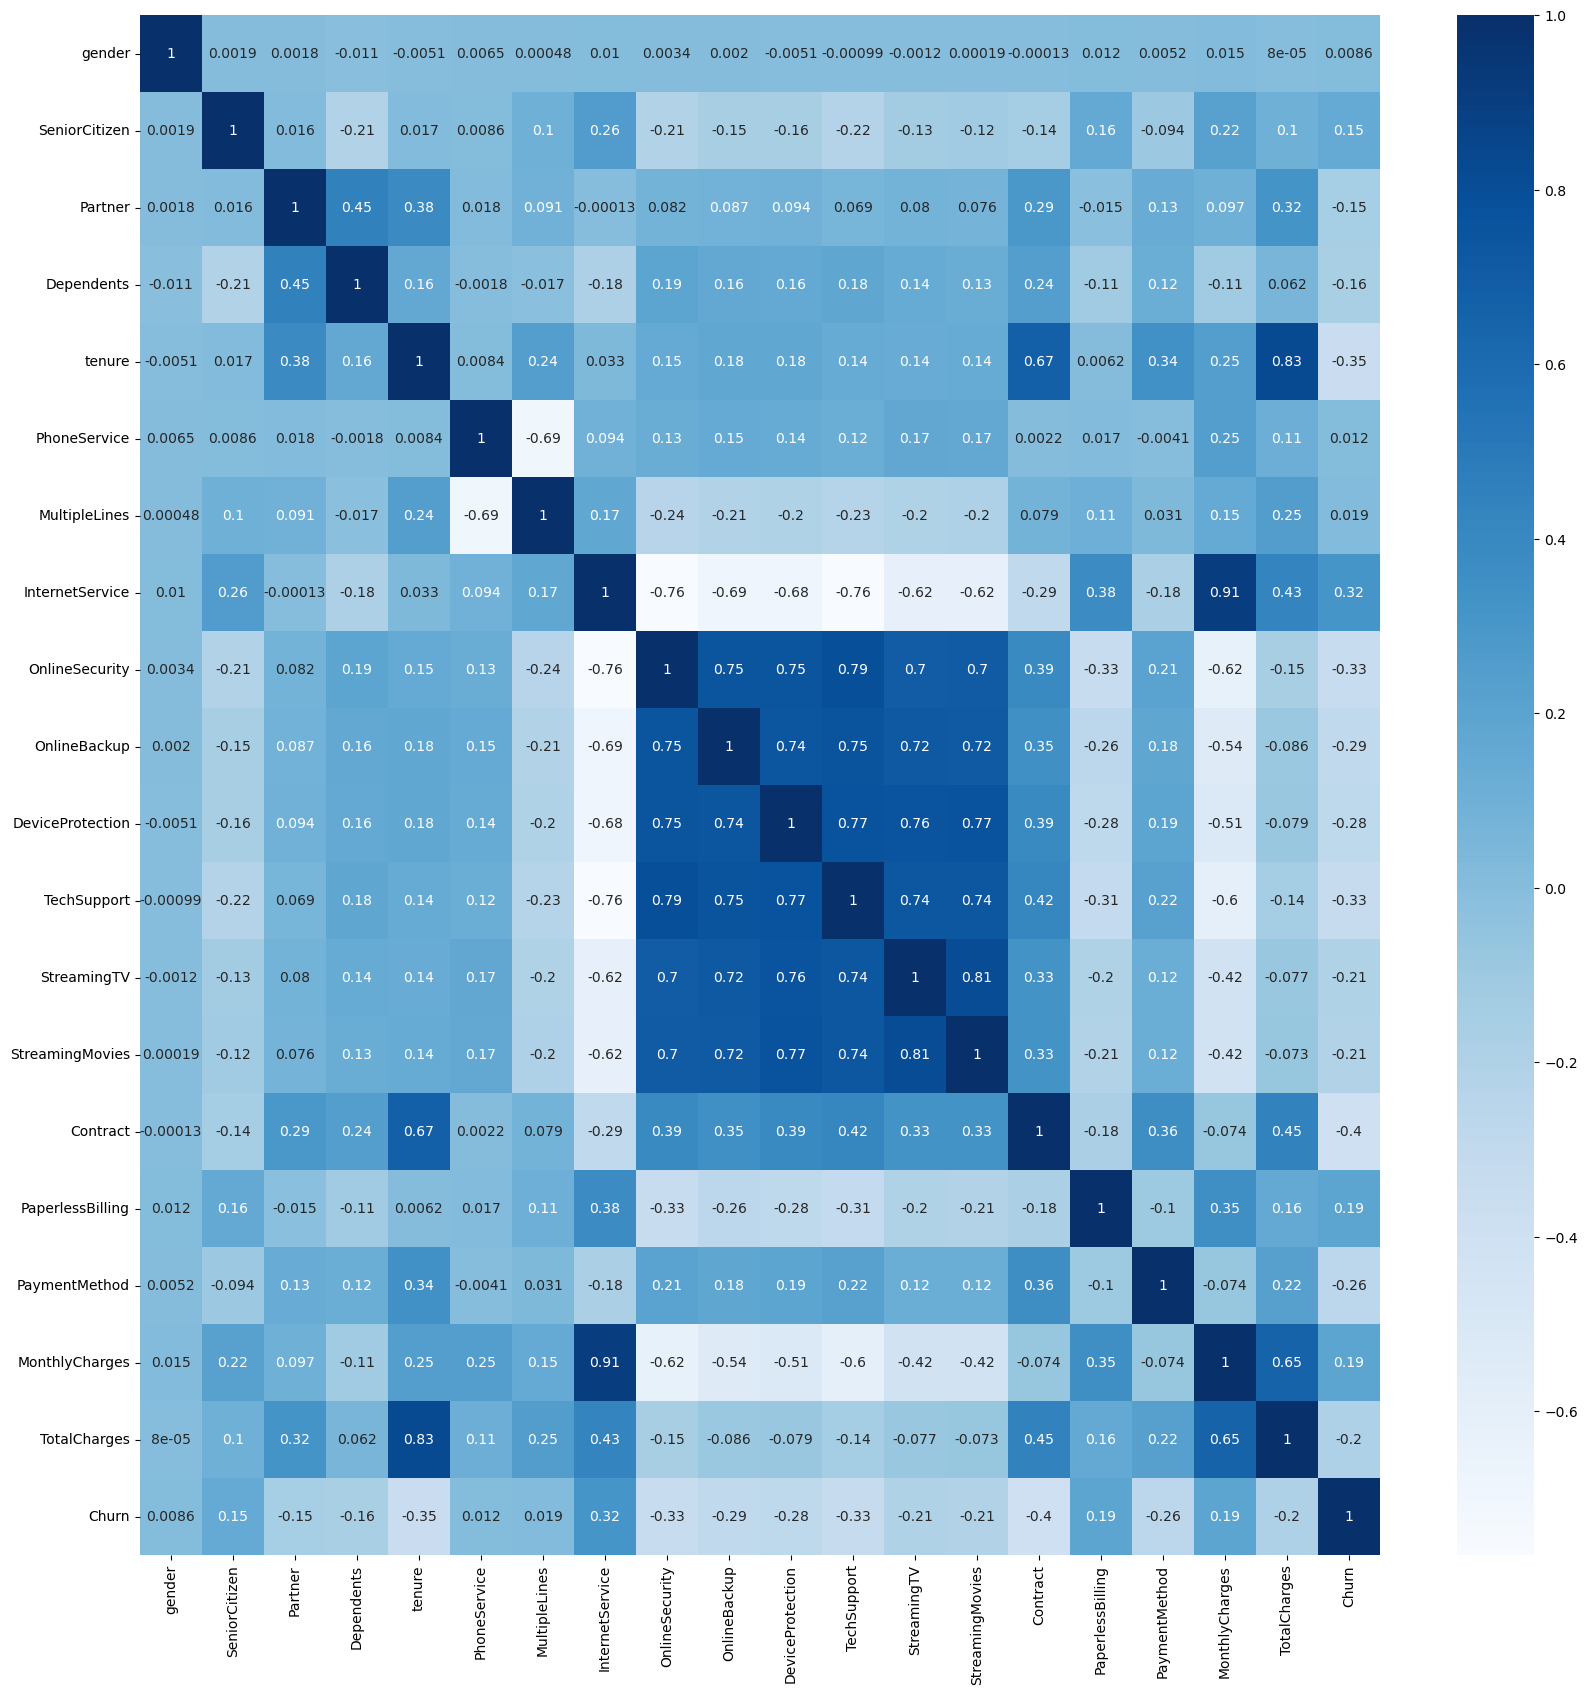

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

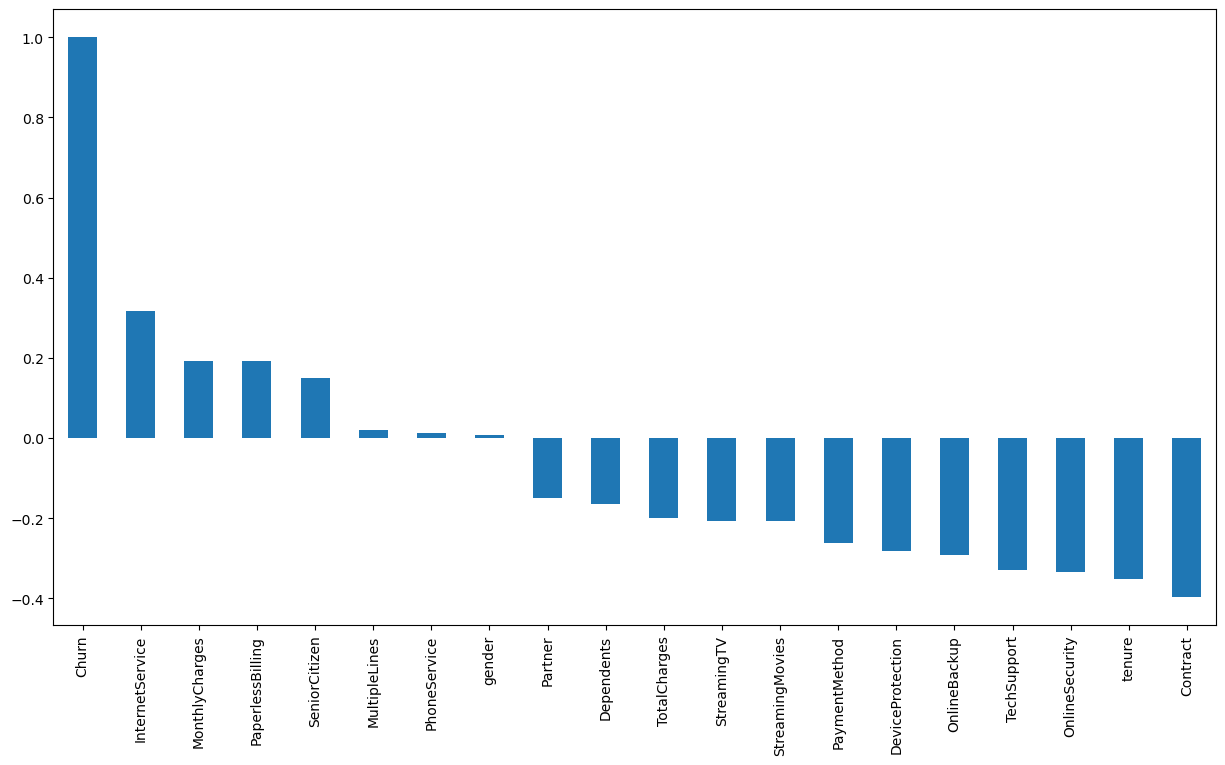

In [14]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [15]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,...,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2279.732178,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,...,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.794434,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.549988,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550049,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.599976,1.000000


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

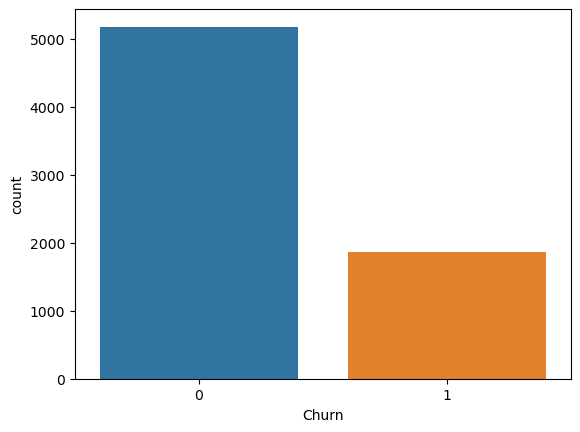

In [18]:
sns.countplot(x=df['Churn'])

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

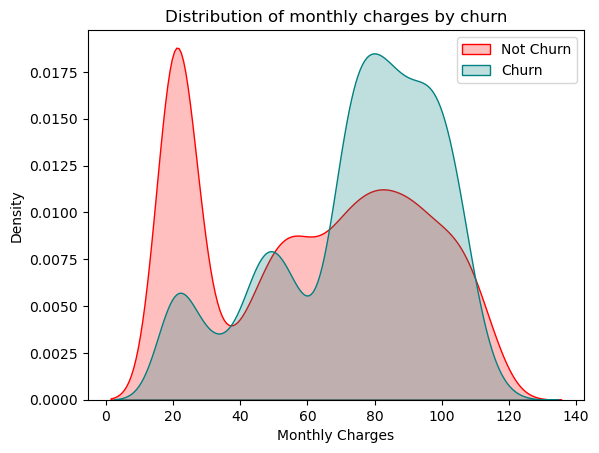

In [85]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Teal", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

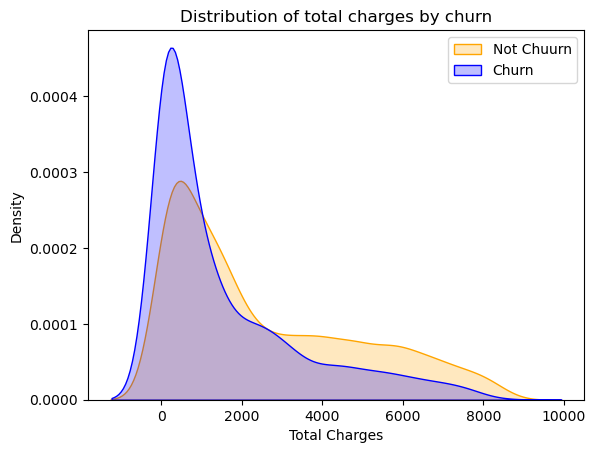

In [90]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Orange", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [9]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [12]:
customer = x_train["customerID"]
customertest = x_test["customerID"]

In [13]:
x_train = x_train.drop(['customerID'],axis=1)
x_test = x_test.drop(['customerID'],axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape

(5634, 19)

In [15]:
df_trans = df[['tenure', 'MonthlyCharges',
               'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans = pd.concat([df_trans, dummy_vars], axis=1)

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(12, input_dim=len(features), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=55, batch_size=80)

Epoch 1/55
71/71 [==============================] - 0s 1ms/step - loss: 0.7765 - accuracy: 0.6395
Epoch 2/55
71/71 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.7528
Epoch 3/55
71/71 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7579
Epoch 4/55
71/71 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.7643
Epoch 5/55
71/71 [==============================] - 0s 971us/step - loss: 0.6191 - accuracy: 0.7693
Epoch 6/55
71/71 [==============================] - 0s 986us/step - loss: 0.6064 - accuracy: 0.7710
Epoch 7/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7712
Epoch 8/55
71/71 [==============================] - 0s 986us/step - loss: 0.5829 - accuracy: 0.7762
Epoch 9/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7781
Epoch 10/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7762
Epoch 11/55
7

45/45 [==============================] - 0s 773us/step


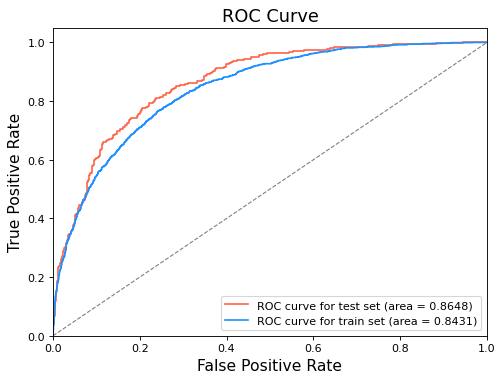

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [29]:
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8268275372604684
Accuracy of train set is 0.802626908058218
Precision of test set is 0.6498599439775911
Precision of train set is 0.6521739130434783
Recall of test set is 0.6609686609686609
Recall of train set is 0.5731225296442688


In [86]:
#grid Search CV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(12, input_dim=len(features), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 82],
    'epochs': [50, 55],
    'optimizer': ['adam']
}
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
64/64 [==============================] - 0s 782us/step - loss: 18.0506 - accuracy: 0.5765
Epoch 2/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7377 - accuracy: 0.4846
Epoch 3/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.7176
Epoch 4/50
64/64 [==============================] - 0s 777us/step - loss: 0.6702 - accuracy: 0.7231
Epoch 5/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.7306
Epoch 6/50
64/64 [==============================] - 0s 757us/step - loss: 0.6453 - accuracy: 0.7325
Epoch 7/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.7331
Epoch 8/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7339
Epoch 9/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7339
Epoch 10/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.7351
Epoch 11/50


64/64 [==============================] - 0s 778us/step - loss: 0.5943 - accuracy: 0.7323
Epoch 13/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.7331
Epoch 14/50
64/64 [==============================] - 0s 748us/step - loss: 0.5903 - accuracy: 0.7369
Epoch 15/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7389
Epoch 16/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.7339
Epoch 17/50
64/64 [==============================] - 0s 777us/step - loss: 0.5929 - accuracy: 0.7320
Epoch 18/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7357
Epoch 19/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7178
Epoch 20/50
64/64 [==============================] - 0s 997us/step - loss: 0.5837 - accuracy: 0.7327
Epoch 21/50
64/64 [==============================] - 0s 785us/step - loss: 0.5812 - accuracy: 0.7406
Epoch 22/50


64/64 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7145
Epoch 25/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.7269
Epoch 26/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7198
Epoch 27/50
64/64 [==============================] - 0s 998us/step - loss: 0.5980 - accuracy: 0.7269
Epoch 28/50
64/64 [==============================] - 0s 725us/step - loss: 0.6140 - accuracy: 0.7125
Epoch 29/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.7340
Epoch 30/50
64/64 [==============================] - 0s 740us/step - loss: 0.6020 - accuracy: 0.7239
Epoch 31/50
64/64 [==============================] - 0s 774us/step - loss: 0.5881 - accuracy: 0.7287
Epoch 32/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7273
Epoch 33/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.7214
Epoch 34/50
64

64/64 [==============================] - 0s 706us/step - loss: 0.6049 - accuracy: 0.7247
Epoch 37/50
64/64 [==============================] - 0s 768us/step - loss: 0.6231 - accuracy: 0.7158
Epoch 38/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7089
Epoch 39/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7125
Epoch 40/50
64/64 [==============================] - 0s 740us/step - loss: 0.6224 - accuracy: 0.7148
Epoch 41/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7119
Epoch 42/50
64/64 [==============================] - 0s 748us/step - loss: 0.6323 - accuracy: 0.7164
Epoch 43/50
64/64 [==============================] - 0s 990us/step - loss: 0.6519 - accuracy: 0.7018
Epoch 44/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.7168
Epoch 45/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7034
Epoch 46/50


64/64 [==============================] - 0s 751us/step - loss: 0.6063 - accuracy: 0.7367
Epoch 13/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7367
Epoch 14/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.7367
Epoch 15/55
64/64 [==============================] - 0s 983us/step - loss: 0.6004 - accuracy: 0.7367
Epoch 16/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7367
Epoch 17/55
64/64 [==============================] - 0s 742us/step - loss: 0.5968 - accuracy: 0.7367
Epoch 18/55
64/64 [==============================] - 0s 729us/step - loss: 0.5953 - accuracy: 0.7367
Epoch 19/55
64/64 [==============================] - 0s 771us/step - loss: 0.5939 - accuracy: 0.7367
Epoch 20/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7367
Epoch 21/55
64/64 [==============================] - 0s 985us/step - loss: 0.5909 - accuracy: 0.7367
Epoch 22/5

64/64 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7188
Epoch 10/55
64/64 [==============================] - 0s 784us/step - loss: 0.6459 - accuracy: 0.7127
Epoch 11/55
64/64 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.6884
Epoch 12/55
64/64 [==============================] - 0s 769us/step - loss: 0.6725 - accuracy: 0.7005
Epoch 13/55
64/64 [==============================] - 0s 707us/step - loss: 0.6153 - accuracy: 0.7166
Epoch 14/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.7107
Epoch 15/55
64/64 [==============================] - 0s 757us/step - loss: 0.6703 - accuracy: 0.6955
Epoch 16/55
64/64 [==============================] - 0s 751us/step - loss: 0.6052 - accuracy: 0.7214
Epoch 17/55
64/64 [==============================] - 0s 739us/step - loss: 0.6412 - accuracy: 0.7034
Epoch 18/55
64/64 [==============================] - 0s 998us/step - loss: 0.6005 - accuracy: 0.7214
Epoch 19

64/64 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.7196
Epoch 7/55
64/64 [==============================] - 0s 725us/step - loss: 0.6374 - accuracy: 0.7145
Epoch 8/55
64/64 [==============================] - 0s 994us/step - loss: 0.6826 - accuracy: 0.7020
Epoch 9/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.7012
Epoch 10/55
64/64 [==============================] - 0s 779us/step - loss: 0.6434 - accuracy: 0.7129
Epoch 11/55
64/64 [==============================] - 0s 706us/step - loss: 0.6367 - accuracy: 0.7097
Epoch 12/55
64/64 [==============================] - 0s 925us/step - loss: 0.6830 - accuracy: 0.6930
Epoch 13/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.7216
Epoch 14/55
64/64 [==============================] - 0s 789us/step - loss: 0.5886 - accuracy: 0.7289
Epoch 15/55
64/64 [==============================] - 0s 970us/step - loss: 0.5963 - accuracy: 0.7235
Epoch 16/55

62/62 [==============================] - 0s 1ms/step - loss: 1.0252 - accuracy: 0.6049
Epoch 4/50
62/62 [==============================] - 0s 1ms/step - loss: 0.7549 - accuracy: 0.6422
Epoch 5/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6860
Epoch 6/50
62/62 [==============================] - 0s 776us/step - loss: 0.7937 - accuracy: 0.6836
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 0.7221 - accuracy: 0.7010
Epoch 8/50
62/62 [==============================] - 0s 778us/step - loss: 0.7883 - accuracy: 0.6793
Epoch 9/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.7053
Epoch 10/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7095
Epoch 11/50
62/62 [==============================] - 0s 734us/step - loss: 0.6989 - accuracy: 0.7020
Epoch 12/50
62/62 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.6925
Epoch 13/50
62/62 [===

62/62 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7321
Epoch 16/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7333
Epoch 17/50
62/62 [==============================] - 0s 737us/step - loss: 0.5891 - accuracy: 0.7325
Epoch 18/50
62/62 [==============================] - 0s 744us/step - loss: 0.5899 - accuracy: 0.7320
Epoch 19/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7274
Epoch 20/50
62/62 [==============================] - 0s 780us/step - loss: 0.5918 - accuracy: 0.7314
Epoch 21/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7363
Epoch 22/50
62/62 [==============================] - 0s 803us/step - loss: 0.6355 - accuracy: 0.7083
Epoch 23/50
62/62 [==============================] - 0s 985us/step - loss: 0.6060 - accuracy: 0.7264
Epoch 24/50
62/62 [==============================] - 0s 987us/step - loss: 0.5878 - accuracy: 0.7320
Epoch 25/5

62/62 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7324
Epoch 28/50
62/62 [==============================] - 0s 994us/step - loss: 0.5984 - accuracy: 0.7263
Epoch 29/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7324
Epoch 30/50
62/62 [==============================] - 0s 785us/step - loss: 0.5865 - accuracy: 0.7322
Epoch 31/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7320
Epoch 32/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7281
Epoch 33/50
62/62 [==============================] - 0s 755us/step - loss: 0.5892 - accuracy: 0.7289
Epoch 34/50
62/62 [==============================] - 0s 790us/step - loss: 0.5983 - accuracy: 0.7237
Epoch 35/50
62/62 [==============================] - 0s 811us/step - loss: 0.5900 - accuracy: 0.7330
Epoch 36/50
62/62 [==============================] - 0s 768us/step - loss: 0.5855 - accuracy: 0.7352
Epoch 37/5

62/62 [==============================] - 0s 778us/step - loss: 0.5791 - accuracy: 0.7334
Epoch 40/50
62/62 [==============================] - 0s 793us/step - loss: 0.5790 - accuracy: 0.7336
Epoch 41/50
62/62 [==============================] - 0s 963us/step - loss: 0.5790 - accuracy: 0.7334
Epoch 42/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7336
Epoch 43/50
62/62 [==============================] - 0s 755us/step - loss: 0.5789 - accuracy: 0.7336
Epoch 44/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7334
Epoch 45/50
62/62 [==============================] - 0s 715us/step - loss: 0.5787 - accuracy: 0.7334
Epoch 46/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7336
Epoch 47/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7334
Epoch 48/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7336
Epoch 49/50


62/62 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7116
Epoch 42/55
62/62 [==============================] - 0s 804us/step - loss: 0.6660 - accuracy: 0.7083
Epoch 43/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.7045
Epoch 44/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.7176
Epoch 45/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7006
Epoch 46/55
62/62 [==============================] - 0s 984us/step - loss: 0.6610 - accuracy: 0.7037
Epoch 47/55
62/62 [==============================] - 0s 989us/step - loss: 0.7205 - accuracy: 0.6933
Epoch 48/55
62/62 [==============================] - 0s 766us/step - loss: 0.6884 - accuracy: 0.7114
Epoch 49/55
62/62 [==============================] - 0s 805us/step - loss: 0.6198 - accuracy: 0.7118
Epoch 50/55
62/62 [==============================] - 0s 746us/step - loss: 0.5976 - accuracy: 0.7241
Epoch 51/5

62/62 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6756
Epoch 13/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6874
Epoch 14/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6934
Epoch 15/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7040
Epoch 16/55
62/62 [==============================] - 0s 804us/step - loss: 0.6776 - accuracy: 0.6928
Epoch 17/55
62/62 [==============================] - 0s 1000us/step - loss: 0.6930 - accuracy: 0.6849
Epoch 18/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.7081
Epoch 19/55
62/62 [==============================] - 0s 1ms/step - loss: 0.7867 - accuracy: 0.6967
Epoch 20/55
62/62 [==============================] - 0s 809us/step - loss: 0.8787 - accuracy: 0.6786
Epoch 21/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.7001
Epoch 22/55
62/

62/62 [==============================] - 0s 815us/step - loss: 0.6176 - accuracy: 0.7172
Epoch 10/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7160
Epoch 11/55
62/62 [==============================] - 0s 814us/step - loss: 0.6223 - accuracy: 0.7158
Epoch 12/55
62/62 [==============================] - 0s 980us/step - loss: 0.5938 - accuracy: 0.7296
Epoch 13/55
62/62 [==============================] - 0s 816us/step - loss: 0.5944 - accuracy: 0.7306
Epoch 14/55
62/62 [==============================] - 0s 809us/step - loss: 0.6068 - accuracy: 0.7200
Epoch 15/55
62/62 [==============================] - 0s 971us/step - loss: 0.6567 - accuracy: 0.7016
Epoch 16/55
62/62 [==============================] - 0s 808us/step - loss: 0.6191 - accuracy: 0.7219
Epoch 17/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.7123
Epoch 18/55
62/62 [==============================] - 0s 982us/step - loss: 0.6923 - accuracy: 0.6961
Epoch 

71/71 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.7366
Epoch 7/50
71/71 [==============================] - 0s 935us/step - loss: 0.6022 - accuracy: 0.7366
Epoch 8/50
71/71 [==============================] - 0s 965us/step - loss: 0.5900 - accuracy: 0.7366
Epoch 9/50
71/71 [==============================] - 0s 713us/step - loss: 0.5937 - accuracy: 0.7366
Epoch 10/50
71/71 [==============================] - 0s 986us/step - loss: 0.5937 - accuracy: 0.7366
Epoch 11/50
71/71 [==============================] - 0s 931us/step - loss: 0.5874 - accuracy: 0.7366
Epoch 12/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7364
Epoch 13/50
71/71 [==============================] - 0s 933us/step - loss: 0.5829 - accuracy: 0.7366
Epoch 14/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7366
Epoch 15/50
71/71 [==============================] - 0s 861us/step - loss: 0.5806 - accuracy: 0.7368
Epoch 16/50

In [87]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters

{'batch_size': 80, 'epochs': 50, 'optimizer': 'adam'}

In [37]:
best_accuracy

0.7362467404859984

In [119]:
#Bayesian Search
from skopt import BayesSearchCV
n_iter=10

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(12, input_dim=len(features), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 82],
    'epochs': [50, 55],
    'optimizer': ['adam']
}
bayes_search = BayesSearchCV(estimator = model, search_spaces = parameters, n_iter=n_iter, scoring = 'accuracy')
bayes_search = bayes_search.fit(X_train,y_train)

Epoch 1/52
56/56 [==============================] - 0s 1ms/step - loss: 12.2342 - accuracy: 0.5749
Epoch 2/52
56/56 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.4890
Epoch 3/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.7284
Epoch 4/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.7331
Epoch 5/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7346
Epoch 6/52
56/56 [==============================] - 0s 841us/step - loss: 0.6531 - accuracy: 0.7331
Epoch 7/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7360
Epoch 8/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.7360
Epoch 9/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.7360
Epoch 10/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.7360
Epoch 11/52
56/5

56/56 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.7218
Epoch 7/52
56/56 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.7284
Epoch 8/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.7124
Epoch 9/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7235
Epoch 10/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.7211
Epoch 11/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7144
Epoch 12/52
56/56 [==============================] - 0s 826us/step - loss: 0.5998 - accuracy: 0.7311
Epoch 13/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7142
Epoch 14/52
56/56 [==============================] - 0s 866us/step - loss: 0.5903 - accuracy: 0.7300
Epoch 15/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.7071
Epoch 16/52
56/56 [==

56/56 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.7136
Epoch 37/52
56/56 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7152
Epoch 38/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.7152
Epoch 39/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.7061
Epoch 40/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7145
Epoch 41/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7163
Epoch 42/52
56/56 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.6992
Epoch 43/52
56/56 [==============================] - 0s 838us/step - loss: 0.6094 - accuracy: 0.7243
Epoch 44/52
56/56 [==============================] - 0s 836us/step - loss: 0.5936 - accuracy: 0.7274
Epoch 45/52
56/56 [==============================] - 0s 827us/step - loss: 0.6793 - accuracy: 0.7094
Epoch 46/52
56/5

57/57 [==============================] - 0s 764us/step - loss: 0.5915 - accuracy: 0.7295
Epoch 43/52
57/57 [==============================] - 0s 822us/step - loss: 0.5894 - accuracy: 0.7313
Epoch 44/52
57/57 [==============================] - 0s 877us/step - loss: 0.6066 - accuracy: 0.7231
Epoch 45/52
57/57 [==============================] - 0s 999us/step - loss: 0.5906 - accuracy: 0.7293
Epoch 46/52
57/57 [==============================] - 0s 964us/step - loss: 0.5933 - accuracy: 0.7275
Epoch 47/52
57/57 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.7289
Epoch 48/52
57/57 [==============================] - 0s 845us/step - loss: 0.5911 - accuracy: 0.7304
Epoch 49/52
57/57 [==============================] - 0s 744us/step - loss: 0.5930 - accuracy: 0.7273
Epoch 50/52
57/57 [==============================] - 0s 664us/step - loss: 0.5837 - accuracy: 0.7326
Epoch 51/52
57/57 [==============================] - 0s 819us/step - loss: 0.5837 - accuracy: 0.7337
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7209
Epoch 20/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.7196
Epoch 21/52
57/57 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.7287
Epoch 22/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7196
Epoch 23/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.7176
Epoch 24/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.7052
Epoch 25/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7076
Epoch 26/52
57/57 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.7265
Epoch 27/52
57/57 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7249
Epoch 28/52
57/57 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.7294
Epoch 29/52
57/57 [===

55/55 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7007
Epoch 27/52
55/55 [==============================] - 0s 897us/step - loss: 0.6585 - accuracy: 0.7082
Epoch 28/52
55/55 [==============================] - 0s 877us/step - loss: 0.6338 - accuracy: 0.7102
Epoch 29/52
55/55 [==============================] - 0s 898us/step - loss: 0.6426 - accuracy: 0.7111
Epoch 30/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7176
Epoch 31/52
55/55 [==============================] - 0s 861us/step - loss: 0.6222 - accuracy: 0.7156
Epoch 32/52
55/55 [==============================] - 0s 868us/step - loss: 0.6400 - accuracy: 0.7160
Epoch 33/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7129
Epoch 34/52
55/55 [==============================] - 0s 839us/step - loss: 0.7364 - accuracy: 0.6980
Epoch 35/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.7078
Epoch 36/5

55/55 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7369
Epoch 32/51
55/55 [==============================] - 0s 867us/step - loss: 0.5761 - accuracy: 0.7371
Epoch 33/51
55/55 [==============================] - 0s 748us/step - loss: 0.5760 - accuracy: 0.7371
Epoch 34/51
55/55 [==============================] - 0s 911us/step - loss: 0.5757 - accuracy: 0.7371
Epoch 35/51
55/55 [==============================] - 0s 806us/step - loss: 0.5757 - accuracy: 0.7369
Epoch 36/51
55/55 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7371
Epoch 37/51
55/55 [==============================] - 0s 967us/step - loss: 0.5752 - accuracy: 0.7371
Epoch 38/51
55/55 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7371
Epoch 39/51
55/55 [==============================] - 0s 897us/step - loss: 0.5751 - accuracy: 0.7371
Epoch 40/51
55/55 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7371
Epoch 41/5

55/55 [==============================] - 0s 822us/step - loss: 0.7932 - accuracy: 0.6976
Epoch 40/51
55/55 [==============================] - 0s 1ms/step - loss: 1.0354 - accuracy: 0.6588
Epoch 41/51
55/55 [==============================] - 0s 784us/step - loss: 0.7683 - accuracy: 0.6854
Epoch 42/51
55/55 [==============================] - 0s 1ms/step - loss: 0.8626 - accuracy: 0.6874
Epoch 43/51
55/55 [==============================] - 0s 856us/step - loss: 0.7344 - accuracy: 0.6954
Epoch 44/51
55/55 [==============================] - 0s 839us/step - loss: 0.7369 - accuracy: 0.6994
Epoch 45/51
55/55 [==============================] - 0s 820us/step - loss: 0.8600 - accuracy: 0.6936
Epoch 46/51
55/55 [==============================] - 0s 829us/step - loss: 1.0510 - accuracy: 0.6738
Epoch 47/51
55/55 [==============================] - 0s 1ms/step - loss: 0.8644 - accuracy: 0.6821
Epoch 48/51
55/55 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.6960
Epoch 49/5

56/56 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.7249
Epoch 49/50
56/56 [==============================] - 0s 832us/step - loss: 0.6688 - accuracy: 0.7151
Epoch 50/50
36/36 [==============================] - 0s 1ms/step
Epoch 1/50
56/56 [==============================] - 0s 1ms/step - loss: 43.5029 - accuracy: 0.7326
Epoch 2/50
56/56 [==============================] - 0s 837us/step - loss: 1.2154 - accuracy: 0.6020
Epoch 3/50
56/56 [==============================] - 0s 860us/step - loss: 0.7191 - accuracy: 0.6477
Epoch 4/50
56/56 [==============================] - 0s 871us/step - loss: 0.6765 - accuracy: 0.6989
Epoch 5/50
56/56 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7204
Epoch 6/50
56/56 [==============================] - 0s 836us/step - loss: 0.6239 - accuracy: 0.7215
Epoch 7/50
56/56 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.7169
Epoch 8/50
56/56 [==============================] - 

55/55 [==============================] - 0s 864us/step - loss: 0.6036 - accuracy: 0.7204
Epoch 10/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.7131
Epoch 11/52
55/55 [==============================] - 0s 899us/step - loss: 0.6248 - accuracy: 0.7164
Epoch 12/52
55/55 [==============================] - 0s 856us/step - loss: 0.6398 - accuracy: 0.7058
Epoch 13/52
55/55 [==============================] - 0s 888us/step - loss: 0.6409 - accuracy: 0.7014
Epoch 14/52
55/55 [==============================] - 0s 860us/step - loss: 0.6123 - accuracy: 0.7213
Epoch 15/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.7087
Epoch 16/52
55/55 [==============================] - 0s 910us/step - loss: 0.6283 - accuracy: 0.7127
Epoch 17/52
55/55 [==============================] - 0s 845us/step - loss: 0.6191 - accuracy: 0.7127
Epoch 18/52
55/55 [==============================] - 0s 871us/step - loss: 0.6134 - accuracy: 0.7204
Epoch 

55/55 [==============================] - 0s 899us/step - loss: 0.5987 - accuracy: 0.7373
Epoch 16/52
55/55 [==============================] - 0s 840us/step - loss: 0.5957 - accuracy: 0.7371
Epoch 17/52
55/55 [==============================] - 0s 965us/step - loss: 0.5927 - accuracy: 0.7373
Epoch 18/52
55/55 [==============================] - 0s 917us/step - loss: 0.5901 - accuracy: 0.7371
Epoch 19/52
55/55 [==============================] - 0s 819us/step - loss: 0.5880 - accuracy: 0.7371
Epoch 20/52
55/55 [==============================] - 0s 783us/step - loss: 0.5866 - accuracy: 0.7371
Epoch 21/52
55/55 [==============================] - 0s 788us/step - loss: 0.5849 - accuracy: 0.7373
Epoch 22/52
55/55 [==============================] - 0s 758us/step - loss: 0.5833 - accuracy: 0.7373
Epoch 23/52
55/55 [==============================] - 0s 817us/step - loss: 0.5821 - accuracy: 0.7371
Epoch 24/52
55/55 [==============================] - 0s 795us/step - loss: 0.5810 - accuracy: 0.7373
Ep

Epoch 18/55
56/56 [==============================] - 0s 772us/step - loss: 0.6004 - accuracy: 0.7284
Epoch 19/55
56/56 [==============================] - 0s 920us/step - loss: 0.5932 - accuracy: 0.7309
Epoch 20/55
56/56 [==============================] - 0s 796us/step - loss: 0.6109 - accuracy: 0.7220
Epoch 21/55
56/56 [==============================] - 0s 818us/step - loss: 0.6081 - accuracy: 0.7224
Epoch 22/55
56/56 [==============================] - 0s 833us/step - loss: 0.6033 - accuracy: 0.7247
Epoch 23/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7220
Epoch 24/55
56/56 [==============================] - 0s 952us/step - loss: 0.5933 - accuracy: 0.7271
Epoch 25/55
56/56 [==============================] - 0s 931us/step - loss: 0.6002 - accuracy: 0.7284
Epoch 26/55
56/56 [==============================] - 0s 830us/step - loss: 0.6251 - accuracy: 0.7215
Epoch 27/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0

56/56 [==============================] - 0s 899us/step - loss: 0.6422 - accuracy: 0.7028
Epoch 16/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7043
Epoch 17/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7110
Epoch 18/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7165
Epoch 19/55
56/56 [==============================] - 0s 859us/step - loss: 0.6392 - accuracy: 0.7081
Epoch 20/55
56/56 [==============================] - 0s 871us/step - loss: 0.7081 - accuracy: 0.6965
Epoch 21/55
56/56 [==============================] - 0s 779us/step - loss: 0.6182 - accuracy: 0.7198
Epoch 22/55
56/56 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7158
Epoch 23/55
56/56 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.6928
Epoch 24/55
56/56 [==============================] - 0s 884us/step - loss: 0.6073 - accuracy: 0.7263
Epoch 25/55


55/55 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.7118
Epoch 21/51
55/55 [==============================] - 0s 823us/step - loss: 0.6392 - accuracy: 0.7049
Epoch 22/51
55/55 [==============================] - 0s 880us/step - loss: 0.6246 - accuracy: 0.7162
Epoch 23/51
55/55 [==============================] - 0s 890us/step - loss: 0.6594 - accuracy: 0.7096
Epoch 24/51
55/55 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.7069
Epoch 25/51
55/55 [==============================] - 0s 864us/step - loss: 0.6297 - accuracy: 0.7085
Epoch 26/51
55/55 [==============================] - 0s 889us/step - loss: 0.6186 - accuracy: 0.7209
Epoch 27/51
55/55 [==============================] - 0s 877us/step - loss: 0.6549 - accuracy: 0.7076
Epoch 28/51
55/55 [==============================] - 0s 824us/step - loss: 0.6020 - accuracy: 0.7238
Epoch 29/51
55/55 [==============================] - 0s 852us/step - loss: 0.7991 - accuracy: 0.6909
Epoch 

55/55 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7369
Epoch 30/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7369
Epoch 31/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7369
Epoch 32/52
55/55 [==============================] - 0s 896us/step - loss: 0.5826 - accuracy: 0.7369
Epoch 33/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7369
Epoch 34/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7369
Epoch 35/52
55/55 [==============================] - 0s 859us/step - loss: 0.5805 - accuracy: 0.7369
Epoch 36/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7369
Epoch 37/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7369
Epoch 38/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7369
Epoch 39/52
55/55 

55/55 [==============================] - 0s 873us/step - loss: 0.5958 - accuracy: 0.7291
Epoch 36/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.7151
Epoch 37/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7235
Epoch 38/52
55/55 [==============================] - 0s 922us/step - loss: 0.6617 - accuracy: 0.6991
Epoch 39/52
55/55 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.7253
Epoch 40/52
55/55 [==============================] - 0s 817us/step - loss: 0.6526 - accuracy: 0.7016
Epoch 41/52
55/55 [==============================] - 0s 889us/step - loss: 0.7033 - accuracy: 0.7069
Epoch 42/52
55/55 [==============================] - 0s 877us/step - loss: 0.6348 - accuracy: 0.7091
Epoch 43/52
55/55 [==============================] - 0s 825us/step - loss: 0.5958 - accuracy: 0.7253
Epoch 44/52
55/55 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.7304
Epoch 45/5

57/57 [==============================] - 0s 1ms/step - loss: 0.8309 - accuracy: 0.6876
Epoch 44/50
57/57 [==============================] - 0s 785us/step - loss: 0.6786 - accuracy: 0.7082
Epoch 45/50
57/57 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7193
Epoch 46/50
57/57 [==============================] - 0s 829us/step - loss: 0.6697 - accuracy: 0.6978
Epoch 47/50
57/57 [==============================] - 0s 828us/step - loss: 0.8174 - accuracy: 0.6763
Epoch 48/50
57/57 [==============================] - 0s 942us/step - loss: 0.6269 - accuracy: 0.7167
Epoch 49/50
57/57 [==============================] - 0s 880us/step - loss: 0.6202 - accuracy: 0.7140
Epoch 50/50
36/36 [==============================] - 0s 1ms/step
Epoch 1/50
57/57 [==============================] - 0s 1ms/step - loss: 12.1641 - accuracy: 0.4677
Epoch 2/50
57/57 [==============================] - 0s 833us/step - loss: 0.8353 - accuracy: 0.7333
Epoch 3/50
57/57 [===========================

69/69 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7366
Epoch 5/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.7366
Epoch 6/52
69/69 [==============================] - 0s 995us/step - loss: 0.6325 - accuracy: 0.7366
Epoch 7/52
69/69 [==============================] - 0s 946us/step - loss: 0.6241 - accuracy: 0.7366
Epoch 8/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.7362
Epoch 9/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.7362
Epoch 10/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7361
Epoch 11/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.7361
Epoch 12/52
69/69 [==============================] - 0s 693us/step - loss: 0.5964 - accuracy: 0.7364
Epoch 13/52
69/69 [==============================] - 0s 939us/step - loss: 0.5929 - accuracy: 0.7364
Epoch 14/52
69/69 [

In [120]:
best_parameters = bayes_search.best_params_
best_accuracy = bayes_search.best_score_
best_parameters

OrderedDict([('batch_size', 82), ('epochs', 52), ('optimizer', 'adam')])

In [121]:
best_accuracy

0.7358886747223409

In [156]:
#new iteration
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(12, input_dim=len(features), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=52, batch_size=82)

Epoch 1/52
69/69 [==============================] - 0s 1ms/step - loss: 5.6364 - accuracy: 0.5394
Epoch 2/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.7174
Epoch 3/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.7359
Epoch 4/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.7492
Epoch 5/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7574
Epoch 6/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.7685
Epoch 7/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7668
Epoch 8/52
69/69 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7678
Epoch 9/52
69/69 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.7675
Epoch 10/52
69/69 [==============================] - 0s 988us/step - loss: 0.5890 - accuracy: 0.7689
Epoch 11/52
69/69

45/45 [==============================] - 0s 993us/step


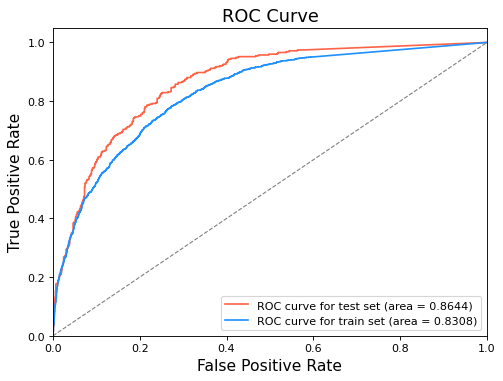

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [158]:
#new result
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8239886444286728
Accuracy of train set is 0.7973020944266951
Precision of test set is 0.6634920634920635
Precision of train set is 0.6538461538461539
Recall of test set is 0.5954415954415955
Recall of train set is 0.5263504611330698


In [50]:
#new iteration 2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(24, input_dim=len(features), activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=70, batch_size=82)

Epoch 1/70
69/69 [==============================] - 0s 1ms/step - loss: 22.0361 - accuracy: 0.6619
Epoch 2/70
69/69 [==============================] - 0s 1ms/step - loss: 1.4642 - accuracy: 0.6109
Epoch 3/70
69/69 [==============================] - 0s 1ms/step - loss: 0.9608 - accuracy: 0.7244
Epoch 4/70
69/69 [==============================] - 0s 1ms/step - loss: 0.9092 - accuracy: 0.7401
Epoch 5/70
69/69 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.7401
Epoch 6/70
69/69 [==============================] - 0s 1ms/step - loss: 0.7970 - accuracy: 0.7551
Epoch 7/70
69/69 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.7627
Epoch 8/70
69/69 [==============================] - 0s 1ms/step - loss: 0.7640 - accuracy: 0.7703
Epoch 9/70
69/69 [==============================] - 0s 1ms/step - loss: 0.7839 - accuracy: 0.7764
Epoch 10/70
69/69 [==============================] - 0s 1ms/step - loss: 0.7398 - accuracy: 0.7719
Epoch 11/70
69/69 

45/45 [==============================] - 0s 714us/step


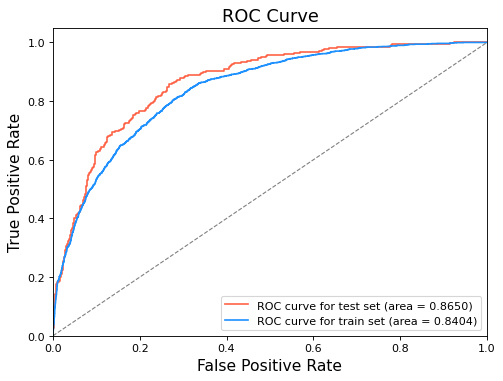

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [152]:
#ANN+Dropout
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8317955997161107
Accuracy of train set is 0.8013844515441959
Precision of test set is 0.6748466257668712
Precision of train set is 0.6615384615384615
Recall of test set is 0.6267806267806267
Recall of train set is 0.5382081686429513
